In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from FINDER_test_utils import *
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plot training process

In [4]:
base_path = 'best_models/tsp_2d/'

In [5]:
trainfolder_list = ['nrange_15_20_len_1011838']

In [12]:
dfs_valid = []
dfs_loss = []
for folder in trainfolder_list:
    fnames = os.listdir(base_path+folder)
    for fname in fnames:
        if '.csv' in fname and not 'Loss' in fname:
            dfs_valid.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['iteration', 'opt_approx'], delimiter=' '))
        elif '.csv' in fname and 'Loss' in fname:
            dfs_loss.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['iteration', 'loss'], delimiter=' '))


In [10]:
min_points = []
for df in dfs_valid:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)

In [19]:
min_points

[array([[1.50000000e+03, 1.01183836e+00]])]

In [21]:
label_list = ['AGNN architecture with helper function']

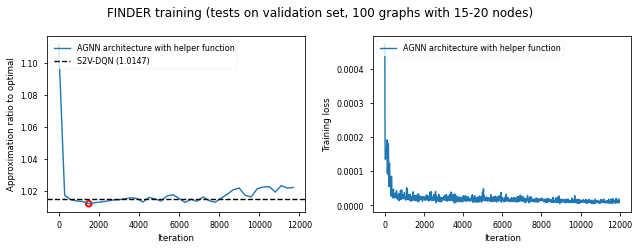

In [36]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 2, figsize=(9,3.5), sharex=False, sharey=False)

for k in range(len(dfs_valid)):
    axs[0].plot(dfs_valid[k]['iteration'], dfs_valid[k]['opt_approx'], label=label_list[k])
    axs[1].plot(dfs_loss[k]['iteration'], dfs_loss[k]['loss'], label=label_list[k])

for k, min_point in enumerate(min_points):
    axs[0].scatter(x=min_point[0][0], y=min_point[0][1], facecolors='none', linewidths=2, edgecolors='red')
                # label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')
# axs.grid(True, axis='both')
axs[0].axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Approximation ratio to optimal')
axs[0].set_xlabel('Iteration')
# axs[0].set_ylim([1.005, 1.15])

axs[1].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[1].set_ylabel('Training loss')
axs[1].set_xlabel('Iteration')

plt.suptitle('FINDER training (tests on validation set, 100 graphs with 15-20 nodes)')
plt.tight_layout()

plt.savefig('plots/training_process.png', dpi=400)

In [21]:
trainfolder_list = ['nrange_15_20_len_1038117']
df_list = []
for folder in trainfolder_list:
    fnames = os.listdir(base_path+folder)
    for fname in fnames:
        if '.csv' in fname:
            df_list.append(pd.read_csv(f'{base_path}{folder}/{fname}', names=['opt_approx']))
for df in df_list:
    df['iteration'] = np.array(df.index)*300
min_points = []
for df in df_list:
    min_point = df.loc[df['opt_approx'] == df['opt_approx'].min(), :].to_numpy()
    min_points.append(min_point)
min_points[0][0][0]

1.0381167529724464

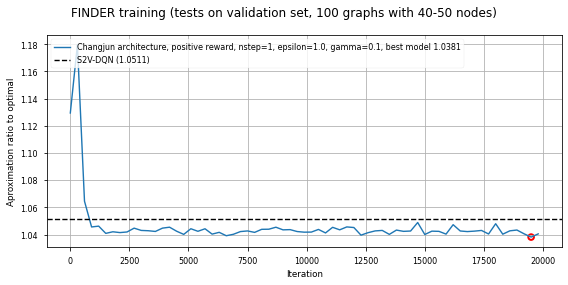

In [25]:
mpl.style.use('seaborn-paper')
#mpl.style.use('seaborn')
#minimum = df[df['opt_approx'] == df['opt_approx'].min()]
minimum_test = 1.018
fig, axs = plt.subplots(1, 1, figsize=(8,4), sharex=True, sharey=True)
#df.plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label='FINDER training')
df_list[0].plot(x='iteration', y='opt_approx', ax=axs, ylim=None, label=f'Changjun architecture, positive reward, nstep=1, epsilon=1.0, gamma=0.1, best model {np.round(min_points[0][0][0],4)}')

for k, min_point in enumerate(min_points):
    axs.scatter(x=min_point[0][1], y=min_point[0][0], facecolors='none', linewidths=2, edgecolors='red')
                # label=f'FINDER training {k+1} best model ({np.round(min_point[0][0],4)})')
axs.grid(True, axis='both')
axs.axhline(y = 1.0511, color = 'black', linestyle = '--', label='S2V-DQN (1.0511)')
axs.legend(loc='upper left')
axs.set_ylabel('Aproximation ratio to optimal')
axs.set_xlabel('Iteration')
plt.suptitle('FINDER training (tests on validation set, 100 graphs with 40-50 nodes)')
plt.tight_layout()

plt.savefig('plots/training_process_large_valid_set.png', dpi=400)